In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('skill_builder_data_corrected.csv')

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,...,0,3,32454,30799,NaN,26,0,NaN,1,1
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,...,0,3,4922,30799,NaN,55,0,NaN,2,2
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,...,0,3,4859,30059,NaN,41,0,NaN,2,2
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,NaN,65,0,0.0,3,3


In [4]:
len(df)

401756

In [5]:
df.columns

Index([u'order_id', u'assignment_id', u'user_id', u'assistment_id',
       u'problem_id', u'original', u'correct', u'attempt_count',
       u'ms_first_response', u'tutor_mode', u'answer_type', u'sequence_id',
       u'student_class_id', u'position', u'type', u'base_sequence_id',
       u'skill_id', u'skill_name', u'teacher_id', u'school_id', u'hint_count',
       u'hint_total', u'overlap_time', u'template_id', u'answer_id',
       u'answer_text', u'first_action', u'bottom_hint', u'opportunity',
       u'opportunity_original'],
      dtype='object')

In [6]:
print 'Total number of skills in the dataset {}'.format(len(df['skill_id'].unique()))

Total number of skills in the dataset 124


In [7]:
df_skill = df.dropna(axis=0, subset=['skill_id'])

In [8]:
df_skill['skill_id'] = df_skill['skill_id'].astype(np.int32)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
print 'Number of rows in data with a skill id {}'.format(len(df_skill))

Number of rows in data with a skill id 338001


In [10]:
stu_skill_dist = df_skill[['user_id', 'skill_id']].groupby(['skill_id']).agg('count')

In [11]:
skills_less_than_100 = stu_skill_dist[stu_skill_dist['user_id'] < 100]

In [12]:
skills_less_than_100.transpose()

skill_id,43,102,165,173,190,193,203,217,221,321,324,331,334,340,343,348,356,362,365
user_id,5,1,90,89,89,89,47,91,89,21,36,9,5,18,32,8,32,87,33


In [13]:
print 'The number of skills which have less than 100 students worked on it {}'.format(len(skills_less_than_100))

The number of skills which have less than 100 students worked on it 19


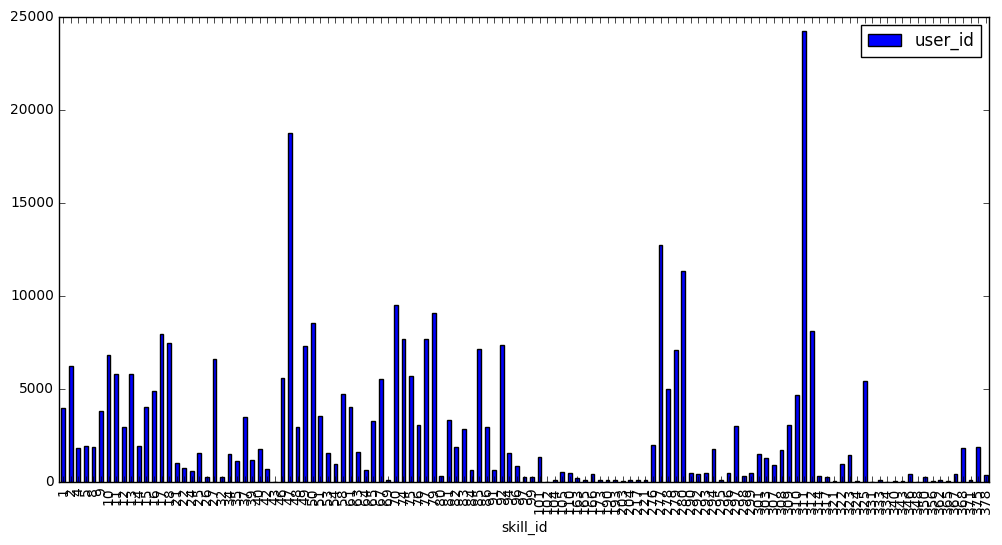

In [14]:
%matplotlib inline
stu_skill_dist.plot(kind='bar', figsize=(12, 6))

In [17]:
few_skills = skills_less_than_100.index.tolist()

In [21]:
final_df_skills = df_skill[~df_skill['skill_id'].isin(few_skills)]

In [23]:
len(final_df_skills) # remove rows without skill tags and skills with few students

337130